In [1]:
!nvidia-smi  # checking for GPU

Mon Oct  2 10:20:20 2023       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 525.105.17   Driver Version: 525.105.17   CUDA Version: 12.0     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   34C    P8     9W /  70W |      0MiB / 15360MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
                                                                               
+-------

### **Importing all required libraries**

In [2]:
import tensorflow as tf
import numpy as np
import math as m
import seaborn as sb
import random
import tensorboard
import matplotlib.pyplot as plt
import datetime,os

from tensorflow.python.client import device_lib
print(tf.test.gpu_device_name())


/device:GPU:0


### **Using GPU**

In [3]:
print("Num GPUs Available: ", len(tf.config.list_physical_devices('GPU')))
gpus = tf.config.list_physical_devices('GPU')
if gpus:
  # Restrict TensorFlow to only use the first GPU
  try:
    tf.config.set_visible_devices(gpus[0], 'GPU')
    logical_gpus = tf.config.list_logical_devices('GPU')
    print(len(gpus), "Physical GPUs,", len(logical_gpus), "Logical GPU")
  except RuntimeError as e:
    # Visible devices must be set before GPUs have been initialized
    print(e)

Num GPUs Available:  1
1 Physical GPUs, 1 Logical GPU


### **Downloading CIFAR-10 Data and preparing train and validation dataset**

In [2]:
Train_data, Validation_data = tf.keras.datasets.cifar10.load_data()
print(len(Train_data[0]), len(Validation_data[0]))
train_x, train_y = Train_data
val_x, val_y = Validation_data

train_x, val_x = train_x / 255.0, val_x / 255.0  # normalizing pixel values of image

50000 10000


### **Category of images in CIFAR-10 data**

In [5]:
classes = ('airplane',
           'automobile',
           'bird',
           'cat',
           'deer',
           'dog',
           'frog',
           'horse',
           'ship',
           'truck')

### **Displaying random images from training set**

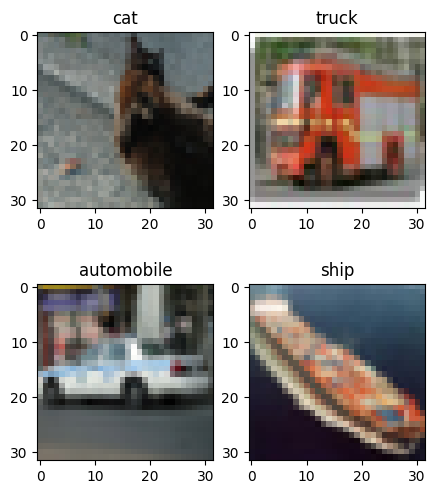

In [6]:
def display_img(train_x,train_y,idx):
    l = len(idx)
    p = int(m.sqrt(l))
    for i in range(l):
        plt.subplot(p,p,i+1)
        plt.imshow(train_x[idx[i]])
        plt.title(classes[train_y[idx[i]][0]])
    plt.show()

idx1 = []
for i in range(0, 4):
    idx1.append(random.randint(0, len(train_x)))
f = plt.figure(figsize=(5,6))
display_img(train_x,train_y,idx1)

### **Converting class vector into binary class matrix**

In [7]:
y_train = tf.keras.utils.to_categorical(train_y, num_classes = 10)
y_val = tf.keras.utils.to_categorical(val_y, num_classes = 10)

### **Plotting loss and accuracy of training and validation data**

In [12]:

def plot_analysis(m):
  f = plt.figure(figsize=(9,5))

  ax1 = f.add_subplot(121)

  ax1.plot(m.history['loss'],color="#E74C3C")
  ax1.plot(m.history['val_loss'],color='#641E16')

  plt.title('Loss comparison between Validation and Train Data set',fontsize=9)
  plt.ylabel('Loss')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'validation'], loc='upper right')

  ax2 = f.add_subplot(122)

  ax2.plot(m.history['accuracy'],color="#E74C3C")
  ax2.plot(m.history['val_accuracy'],color='#641E16')

  plt.title('Accuracy comparison between Validation and Train Data set',fontsize=9)
  plt.ylabel('Accuracy')
  plt.xlabel('Epoch')
  plt.legend(['Train', 'validation'], loc='upper right')
  print("\n")
  print("\n")
  print("\n")
  plt.show()

### **Training model for two cases with and without data augmentation**



Training model before Data Augmentation

Epoch 1/20
1562/1562 - 11s - loss: 1.9413 - accuracy: 0.2556 - val_loss: 1.6631 - val_accuracy: 0.3845 - 11s/epoch - 7ms/step
Epoch 2/20
1562/1562 - 8s - loss: 1.6312 - accuracy: 0.3927 - val_loss: 1.4907 - val_accuracy: 0.4533 - 8s/epoch - 5ms/step
Epoch 3/20
1562/1562 - 8s - loss: 1.5051 - accuracy: 0.4429 - val_loss: 1.4107 - val_accuracy: 0.4833 - 8s/epoch - 5ms/step
Epoch 4/20
1562/1562 - 8s - loss: 1.4202 - accuracy: 0.4811 - val_loss: 1.3285 - val_accuracy: 0.5175 - 8s/epoch - 5ms/step
Epoch 5/20
1562/1562 - 8s - loss: 1.3453 - accuracy: 0.5090 - val_loss: 1.2833 - val_accuracy: 0.5375 - 8s/epoch - 5ms/step
Epoch 6/20
1562/1562 - 8s - loss: 1.2819 - accuracy: 0.5330 - val_loss: 1.2307 - val_accuracy: 0.5562 - 8s/epoch - 5ms/step
Epoch 7/20
1562/1562 - 8s - loss: 1.2269 - accuracy: 0.5570 - val_loss: 1.2302 - val_accuracy: 0.5525 - 8s/epoch - 5ms/step
Epoch 8/20
1562/1562 - 8s - loss: 1.1809 - accuracy: 0.5747 - val_loss: 1.1647 - val_ac

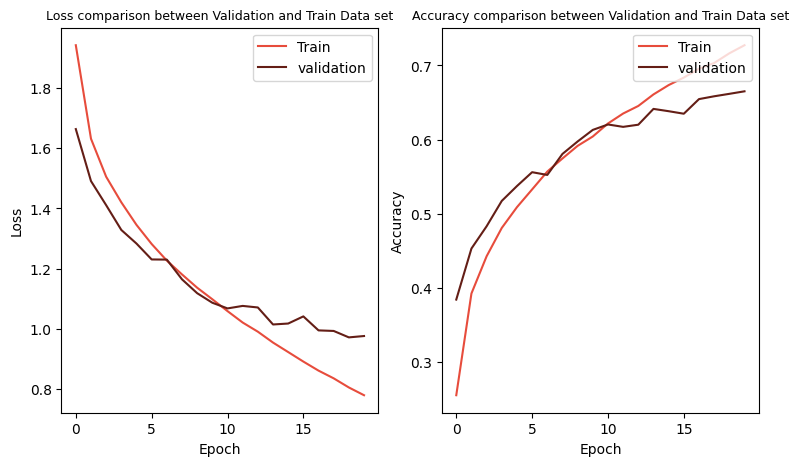



Training model after Data Augmentation

Epoch 1/120


<ipython-input-13-b6d5fd0fac8e>:56: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  m2    =   model.fit_generator(datagen.flow(train_x, y_train, batch_size=32),


1562/1562 - 33s - loss: 2.0357 - accuracy: 0.2165 - val_loss: 1.7726 - val_accuracy: 0.3464 - 33s/epoch - 21ms/step
Epoch 2/120
1562/1562 - 30s - loss: 1.7883 - accuracy: 0.3247 - val_loss: 1.6364 - val_accuracy: 0.3966 - 30s/epoch - 19ms/step
Epoch 3/120
1562/1562 - 31s - loss: 1.6752 - accuracy: 0.3787 - val_loss: 1.4904 - val_accuracy: 0.4490 - 31s/epoch - 20ms/step
Epoch 4/120
1562/1562 - 30s - loss: 1.6074 - accuracy: 0.4069 - val_loss: 1.5104 - val_accuracy: 0.4409 - 30s/epoch - 19ms/step
Epoch 5/120
1562/1562 - 31s - loss: 1.5531 - accuracy: 0.4271 - val_loss: 1.4141 - val_accuracy: 0.4751 - 31s/epoch - 20ms/step
Epoch 6/120
1562/1562 - 30s - loss: 1.5100 - accuracy: 0.4439 - val_loss: 1.3721 - val_accuracy: 0.4984 - 30s/epoch - 19ms/step
Epoch 7/120
1562/1562 - 31s - loss: 1.4708 - accuracy: 0.4592 - val_loss: 1.3836 - val_accuracy: 0.4943 - 31s/epoch - 20ms/step
Epoch 8/120
1562/1562 - 30s - loss: 1.4297 - accuracy: 0.4777 - val_loss: 1.2700 - val_accuracy: 0.5327 - 30s/epoch 

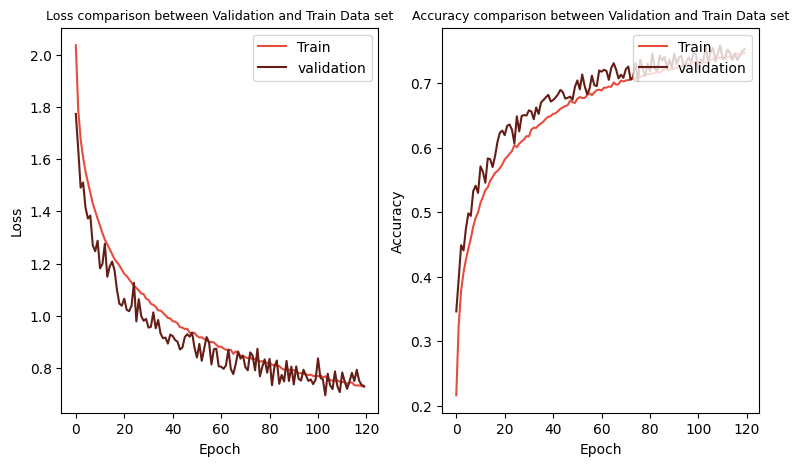

In [13]:
for i in range(2):
    model = tf.keras.Sequential([
        tf.keras.layers.Conv2D(16,(5,5),padding = 'SAME', activation = 'relu', input_shape=(32,32,3)),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2) ,padding = 'SAME'),

        tf.keras.layers.Conv2D(64,(5,5),(2,2),padding = 'SAME', activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2) ,padding = 'SAME'),

        tf.keras.layers.Conv2D(80,(5,5),(3,3),padding = 'SAME', activation = 'relu'),
        tf.keras.layers.MaxPooling2D(pool_size = (2,2) ,padding = 'SAME'),

        tf.keras.layers.Conv2D(128,(5,5),(4,4),padding = 'SAME', activation = 'relu'),

        tf.keras.layers.Flatten(),

        tf.keras.layers.Dense(256, activation = 'relu'),
        tf.keras.layers.Dropout(0.3),

        tf.keras.layers.Dense(128, activation = 'relu'),
        tf.keras.layers.Dropout(0.2),

        tf.keras.layers.Dense(10, activation = 'softmax')
    ])

    opt = tf.keras.optimizers.Adam(learning_rate = 0.0001)
    model.compile(optimizer=opt, loss='categorical_crossentropy', metrics=['accuracy'])

    if(i==0):
      print("\n")
      print("Training model before Data Augmentation\n")
      m1 = model.fit(train_x, y_train,
                    batch_size=32,
                    epochs=20,
                    steps_per_epoch = train_x.shape[0] // 32,
                    verbose=2,
                    validation_data=(val_x, y_val),
                    shuffle = True)
      plot_analysis(m1)

    else:
      print("\n")
      print("Training model after Data Augmentation\n")
      datagen = tf.keras.preprocessing.image.ImageDataGenerator(featurewise_center=False,  # set input mean to 0 over the dataset
                                                          samplewise_center=False,  # set each sample mean to 0
                                                          featurewise_std_normalization=False,  # divide inputs by std of the dataset
                                                          samplewise_std_normalization=False,  # divide each input by its std
                                                          zca_whitening=False,  # apply ZCA whitening
                                                          rotation_range=10,  # randomly rotate images in the range (degrees, 0 to 180)
                                                          width_shift_range=0.2,  # randomly shift images horizontally (fraction of total width)
                                                          height_shift_range=0.2,  # randomly shift images vertically (fraction of total height)
                                                          horizontal_flip=True,  # randomly flip images
                                                          vertical_flip=False)  # randomly flip images


      datagen.fit(train_x)
      m2    =   model.fit_generator(datagen.flow(train_x, y_train, batch_size=32),
                                  steps_per_epoch=train_x.shape[0] // 32,
                                  epochs=120,
                                  verbose = 2,
                                  validation_data=(val_x, y_val),
                                  shuffle = True)
      plot_analysis(m2)
